**DeapSECURE module 4: Deap Learning**

# Session 2: Deep Learning

Welcome to the DeapSECURE online training program!
This is a Jupyter notebook for the hands-on learning activities of the
["Deap Learning" module](https://deapsecure.gitlab.io/deapsecure-lesson04-nn/),
Please visit the [DeapSECURE](https://deapsecure.gitlab.io/) website to learn more about our training program.

In this session, We will use this notebook to prepare the Sherlock dataset for the DL lesson

## Data Preparation

When preparing data for analytics and machine learning, up to two-thirds of the time is actually spent preparing the data.
This may sound like a waste of time, but that step is absolutely crucial to obtaining trustworthy insight from the data.
The goal of **data preparation** is to achieve a clean, consistent and processable state of data.

In this session, you will perform data preparation used in the previous ML workshop.

**QUICK LINKS**
* [Setup](#sec-setup)
* [Loading Sherlock Data](#sec-load_data)
* [Traditional Machine Learning](#sec-ML)
* [Deep Neural Network](#sec-NN)
* [Parallel Computing](#sec-Par)

<a id="sec-setup"></a>
## 1. Setup Instructions

If you are opening this notebook from the Wahab OnDemand interface, you're all set.

If you see this notebook elsewhere, and want to perform the exercises on Wahab cluster, please follow the steps outlined in our setup procedure.

1. Make sure you have activated your HPC service.
2. Point your web browser to https://ondemand.wahab.hpc.odu.edu/ and sign in with your MIDAS ID and password.
3. Create a new Jupyter session using "legacy" Python suite, then create a new "Python3" notebook. (See <a href="https://wiki.hpc.odu.edu/en/ood-jupyter" target="_blank">ODU HPC wiki</a> for more detailed help.)
4. Get the necessary files using commands below within Jupyter:

       mkdir -p ~/CItraining/module-nn
       cp -pr /shared/DeapSECURE/module-nn/. ~/CItraining/module-nn
       cd ~/CItraining/module-nn

The file name of this notebook is `NN-session-2.ipynb`.

### 1.1 Reminder

* Throughout this notebook, `#TODO` is used as a placeholder where you need to fill in with something appropriate. 

* To run a code in a cell, press `Shift+Enter`.

* <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf" target="_blank">Pandas cheatsheet</a>

* <a href="https://deapsecure.gitlab.io/deapsecure-lesson02-bd/10-pandas-intro/index.html#summary-of-indexing-syntax" target="_blank">Summary table of the commonly used indexing syntax</a> from our own lesson.

* <a href="https://keras.io/api/" target="_blank">Keras API document</a>

We recommend you open these on separate tabs or print them;
they are handy help for writing your own codes.

### 1.2 Loading Python Libraries

Next step, we need to import the required libraries into this Jupyter Notebook:
`pandas`, `numpy`,`matplotlib.pyplot`,`sklearn` and `tensorflow`.

**For Wahab cluster only**: before importing these libraries, we have to load the `DeapSECURE` environment module:

In [2]:
# Run to load environment modules on HPC
module("load", "DeapSECURE")


The following have been reloaded with a version change:
  1) libjpeg-turbo/2.0.2 => libjpeg-turbo/2.0.3




Few additional modules need to be loaded to access the GPU via CUDA and TensorFlow library.
Keras is now part of TensorFlow:

In [3]:
module("load", "cuda")
module("load", "py-tensorflow")
module("list")



The following have been reloaded with a version change:
  1) py-numpy/1.17.3 => py-numpy/1.16.3



Currently Loaded Modules:
  1) intel-mkl/2019.4.243      22) py-cycler/0.10.0
  2) texlive/2020              23) py-kiwisolver/1.1.0
  3) zlib/1.2.11               24) py-pyparsing/2.4.2
  4) libpng/1.6.37             25) libjpeg-turbo/2.0.3
  5) bzip2/1.0.8               26) py-pillow/6.2.0
  6) freetype/2.10.1           27) py-matplotlib/3.1.1
  7) xz/5.2.4                  28) py-scipy/1.3.1
  8) libtiff/4.0.10            29) py-seaborn/0.11.1
  9) openjpeg/2.3.1            30) py-pip/19.3
 10) python/3.7.3              31) py-joblib/0.14.0
 11) py-markupsafe/1.0         32) py-scikit-learn/0.22.2.post1
 12) py-babel/2.6.0            33) gmp/6.1.2
 13) py-jinja2/2.10            34) mpfr/4.0.2
 14) py-six/1.12.0             35) mpc/1.1.0
 15) py-jupyter/1.1.4          36) DeapSECURE/2020
 16) py-python-dateutil/2.8.0  37) cuda/10.2.89
 17) py-pytz/2019.3            38) hdf5/1.10.5
 18

Now we can import all the required modules into Python:

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

import tensorflow as tf
import tensorflow.keras as keras

%matplotlib inline

In [5]:
# tools for machine learning:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# for evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix
# classic machine learning models:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Import KERAS objects
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

<a id="sec-load_data"></a>
## 2. Loading Sherlock Application Dataset

First of all, let us review the data preparation step, data wrangling step and machine learning step one by one in this bigger dataset. In the first step above we are actually using two Python scripts: `Prep_ML.py` and `analysis_sherlock_ML.py`

The script `Prep_ML.py` contains all the steps necessary to read the data, remove useless data, handle missing data, extract the feature matrix and labels, then do the train/dev split. Load the commands contained in this script into your current Jupyter notebook using the IPython’s `%load` magic. Then you can run this function.

The script `analysis_sherlock_ML.py` is a library of functions, which contains the steps we described in the earlier lesson. These functions are clearly named such as: `preprocess_sherlock_19F17C`, `step0_label_features`, `step_onehot_encoding`, and `step_feature_scaling`. 


Uncomment and run the magic statement `%load Prep_ML.py` below.
(It will replace the cell with the contents of Prep_ML.py.)
You may have to run this cell twice with `Shift+Enter` to actually run the loaded code.

In [9]:
#%load Prep_ML.py
"""^^^ Uncomment and run the magic statement above.
   You may have to run the cell twice to actually run this cell!""";

After the cell above is executed, you will find the training & test data in the following members of `Rec` object:

* `Rec.df_features`: DataFrame of the features for the machine learning models
* `Rec.labels`: The labels (expected output of the ML models)
* `Rec.train_features` = training data's features
* `Rec.test_features` = testing data's features
* `Rec.train_labels` = training data's labels
* `Rec.test_labels` = testing data's labels

We use this approach to manage the complexity of having too many variables (e.g. `train_F`, `train_F2`, `train_F3`, ...).

### 2.1 About the SherLock "18-apps" Dataset

This is a more diverse subset of the SherLock Application dataset, covering significantly more applications and features.

> Your challenge is to train a similar model (like in the previous notebooks) using the "18-apps" dataset to correctly classify running apps on the smartphone with very high accuracy (> 99%).

**EXERCISE**

Take a peek at the training feature DataFrame.

In [12]:
"""Take a peek at the training feature DataFrame.""";
#TODO

From above, we know that we are working with a significantly larger data file, `sherlock/sherlock_18apps.csv`.


**Question:**

- Please check out the `analysis_sherlock_ML.py` and see how this function defined.
- How many features for each record?
- How many applications in the total dataset?
- How many records in the seperated training and testing dataset?

This dataset has 19 features for each record and 18 applications in total.

<a id="sec-ML"></a>
## 3. Traditional Machine Learning 

Now, we first try the traditional machine learning algorithms we learn in the previous session. 
Here we test on **Decision Tree** and **Logistic Regression**. 
To simplify the code, we will use the `model_evaluate` function to evaluate the performance of a machine learning model (whether traditional ML or neural network model).

In [15]:
def model_evaluate(model,test_F,test_L):
    test_L_pred = model.predict(test_F)
    print("Evaluation by using model:",type(model).__name__)
    print("accuracy_score:",accuracy_score(test_L, test_L_pred))
    print("confusion_matrix:","\n",confusion_matrix(test_L, test_L_pred))
    return

In [20]:
ML_dtc = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=6,
                                   min_samples_split=8)
%time ML_dtc.fit(Rec.train_features, Rec.train_labels)

CPU times: user 1.29 s, sys: 16.4 ms, total: 1.3 s
Wall time: 1.31 s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
model_evaluate(ML_dtc, Rec.test_features, Rec.test_labels)

Evaluation by using model: DecisionTreeClassifier
accuracy_score: 0.9497216932766954
confusion_matrix: 
 [[ 1829     1     0     0     0     0     0     0     0     0     0    18     0     0     0     0     1     0]
 [    0  5477     0     0     0    69     0     0     0     0     0     0     0     5     0     0     2     0]
 [    1   610  2753     0     0    25     0     5     0     1     1     1     0     2     0     0     0     0]
 [    0     0     0  4029     0     0    15     0     0     0     0     0     0     0     0     0     0    10]
 [    0     0     0     0  4006     0     0     0     0     0     0     0     0     0     0     0     0     0]
 [   64    28     0     0     0  3183     1     0     0     0     0     1     0    49     0     0     0     0]
 [    0   143     0     0     0     2 10459     0     0     0    15     0     0     0     0     0  1369     0]
 [    0    58     0     0     0    24     4  1408     0     1     0     0     0     1     0     0    11     0]
 [    3

In [19]:
ML_log = LogisticRegression(solver='lbfgs')
%time ML_log.fit(Rec.train_features, Rec.train_labels)

/shared/apps/auto/py-scikit-learn/0.22.2.post1-gcc-7.3.0-wpia/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
model_evaluate(ML_log, Rec.test_features, Rec.test_labels)

Evaluation by using model: LogisticRegression
accuracy_score: 0.9197854108686099
confusion_matrix: 
 [[ 1387     3    63     0     0   319     0     0     0     0     0     0     0    72     5     0     0     0]
 [    0  4590   390     0     0    37    77    10     6    64     0     0     0    72    31   273     3     0]
 [   60   271  2817     0     0     7    13     4     0     0     0     0     0    85   141     1     0     0]
 [    0     1     0  4021     0     2    11     4     0     0     5     0     0     0     0     2     0     8]
 [    0     0     0     0  3999     0     0     0     0     7     0     0     0     0     0     0     0     0]
 [   47    39    14     0     0  3189    24    10     1     0     0     0     0     2     0     0     0     0]
 [    7    93     0    51     0    19 11628     8     0     0    29    58     0     0     0     0    93     2]
 [    0    28     0     2     0    33     1  1442     0     0     0     1     0     0     0     0     0     0]
 [  147    

**QUESTIONS**:

* Do you notice issues with the training process of any of the models above?
* (Optional) Can you find a way to ensure full convergence of the training?

By now, we have a pretty good background knowledge about this dataset.
And we know the accuracy scores we can get by using the Decision Tree and Logistic Regression methods,
which are reasonably good, but not close to 99%.

### Timing the Computation

Do you notice that the training of logistic regression model takes a while?
Often we want to know *how long* this actually takes place.
We can get this timing easily in Jupyter by prepending `%time` to the Python statement we'd like to measure the execution time.

**EXERCISE**:
If you haven't already, let's retrain the logistic regression model here and get the timing:

> #### About the Warning Message
>
> The training phase stops with an error:
>
> ```
> ConvergenceWarning: lbfgs failed to converge (status=1):
> STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
> ```
>
> This happens because the solver fails to reach convergence after the maximum number of iteration (default=100) is reached.
> You may want to investigate by trying different solvers in the `LogisticRegression` object.
> Please Scikit-learn documentation on [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), the `solver` argument, if you are interested.
> Our internal test showed that with another solver

<a id="sec-NN"></a>
## 4. Building Neural Networks to Classify Applications

Let us now proceed by building some neural network models to classify smartphone apps.

### 4.1 One-Hot Encoding

When using neural networks to do a classification task, we need to encode the labels using **one-hot encoding**.
This is necessary because many machine learning algorithms require numeric labels due to implementation efficiency, as such, any categorical data must be converted to numerical data.


For more information on why we need one-hot encoding, see these articles:

* https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
* https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

Comment: We did not have to do one-hot in scikit-learn, because the ML objects such as `DecisionTreeClassifier` does it for us behind the scene.

Similarly, any input features that are of categorical data type will also have to be encoded using either integer encoding or one-hot encoding.


In [25]:
Rec.train_L_onehot = pd.get_dummies(Rec.train_labels)
Rec.test_L_onehot = pd.get_dummies(Rec.test_labels)

For one-hot encoding, there is a `1` in a distinct spot for every category and `0` everywhere else.
Below shows the first five rows; notice that there is only a single `1` in each row, with the rest being `0`.

In [26]:
Rec.train_L_onehot.head()

Calendar  Chrome  ES File Explorer  Facebook  Geo News  Gmail  \
247525         0       0                 0         0         0      0   
93942          0       0                 0         0         0      1   
22691          0       0                 0         0         0      1   
202123         0       0                 0         0         0      0   
230029         0       0                 0         0         0      0   

        Google App  Hangouts  Maps  Messages  Messenger  Moovit  Moriarty  \
247525           0         0     1         0          0       0         0   
93942            0         0     0         0          0       0         0   
22691            0         0     0         0          0       0         0   
202123           0         0     0         0          0       0         0   
230029           1         0     0         0          0       0         0   

        Photos  Skype  Waze  WhatsApp  YouTube  
247525       0      0     0         0        0  
93942        0      0     0         0        0  
22691        0      0     0         0        0  
202123       0      0     0         0        1  
230029       0      0     0         0        0

### 4.2 No Hidden Layer

Here, we first give an example of a neural network model without any hidden layer.

In [27]:
def NN_Model_no_hidden(learning_rate):
    """Definition of deep learning model with one dense hidden layer"""
    model = Sequential([
        Dense(18, activation='softmax',input_shape=(19,),kernel_initializer='random_normal')
    ])
    adam=tf.keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

We train this model with an initial *learning rate* of 0.0003.

In [28]:
model_0 = NN_Model_no_hidden(0.0003)
model_0_history = model_0.fit(Rec.train_features,
            Rec.train_L_onehot,
            epochs=5, batch_size=32,
            validation_data=(Rec.test_features, Rec.test_L_onehot),
            verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Train on 218461 samples, validate on 54616 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 10s - loss: 1.6887 - acc: 0.5517 - val_loss: 1.2622 - val_acc: 0.6810
Epoch 2/5
 - 9s - loss: 1.1127 - acc: 0.7251 - val_loss: 1.0040 - val_acc: 0.7619
Epoch 3/5
 - 9s - loss: 0.9270 - acc: 0.7847 - val_loss: 0.8686 - val_acc: 0.7872
Epoch 4/5
 - 9s - loss: 0.8177 - acc: 0.8042 - val_loss: 0.7802 - val_acc: 0.8105
Epoch 5/5
 - 9s - loss: 0.7428 - acc: 0.8178 - val_loss: 0.7168 - val_acc: 0.8216


> To better analyze the training process, we would like to visualize model training history.
> In Keras, we can collect the history with `history` function, returned from training the model and creates two charts:
> - A plot of accuracy on the training and validation datasets over training epochs.
> - A plot of loss on the training and validation datasets over training epochs.


In [29]:
model_0_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [30]:
def plot_loss(model_history):
    # summarize history for loss
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [31]:
def plot_acc(model_history):
    # summarize history for accuracy
    plt.plot(model_history.history['acc'])
    plt.plot(model_history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

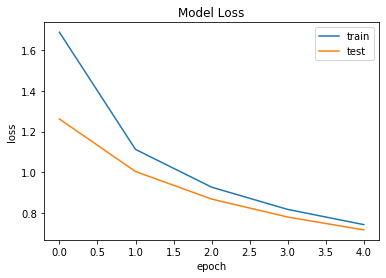

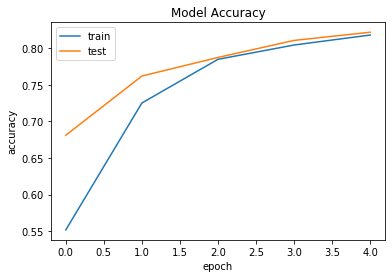

In [32]:
plot_loss(model_0_history)
plot_acc(model_0_history)

**QUESTIONS**:

1. What is the effect of changing the learning rate?
   (Examples: 0.03, 0.003, or 0.00003)
   
2. What will happen if we increase the `epochs` value? (To 10, 20?)

3. What is the ultimate accuracy of one-layer model compared to Decision Tree and Logistic Regression?

### 4.2 One Hidden Layer

Apparently, the first NN model that we created above did not perform very well.
One way to improve the performance of a NN model is to add one or more hidden layers.
The function below has a hidden layer, an output layer, and utilizes the `adam` optimizer that was used in the previous notebook.
We will use this function to test the performance based on different parameters (number of hidden neurons, hidden layers, learning rate, etc.).
To start, let us try an example of a model with 1 hidden layer, `18` hidden neurons, and a learning rate of `0.0003`.

In [33]:
def NN_Model(hidden_neurons,learning_rate):
    """Definition of deep learning model with one dense hidden layer"""
    model = Sequential([
        # More hidden layers can be added here
        Dense(hidden_neurons, activation='relu',input_shape=(19,),kernel_initializer='random_normal'), # Hidden Layer
        Dense(18, activation='softmax') # Output Layer
    ])
    adam=tf.keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [34]:
model_1 = NN_Model(18,0.0003)
model_1_history=model_1.fit(Rec.train_features,
            Rec.train_L_onehot,
            epochs=10, batch_size=32,
            validation_data=(Rec.test_features, Rec.test_L_onehot),
            verbose=2)

Train on 218461 samples, validate on 54616 samples
Epoch 1/10
 - 11s - loss: 1.0628 - acc: 0.7179 - val_loss: 0.5014 - val_acc: 0.8793
Epoch 2/10
 - 10s - loss: 0.3785 - acc: 0.9135 - val_loss: 0.3049 - val_acc: 0.9296
Epoch 3/10
 - 10s - loss: 0.2662 - acc: 0.9365 - val_loss: 0.2355 - val_acc: 0.9412
Epoch 4/10
 - 10s - loss: 0.2144 - acc: 0.9466 - val_loss: 0.1942 - val_acc: 0.9555
Epoch 5/10
 - 10s - loss: 0.1805 - acc: 0.9579 - val_loss: 0.1662 - val_acc: 0.9597
Epoch 6/10
 - 10s - loss: 0.1554 - acc: 0.9640 - val_loss: 0.1446 - val_acc: 0.9654
Epoch 7/10
 - 10s - loss: 0.1366 - acc: 0.9682 - val_loss: 0.1284 - val_acc: 0.9689
Epoch 8/10
 - 10s - loss: 0.1223 - acc: 0.9713 - val_loss: 0.1164 - val_acc: 0.9714
Epoch 9/10
 - 10s - loss: 0.1104 - acc: 0.9737 - val_loss: 0.1048 - val_acc: 0.9739
Epoch 10/10
 - 10s - loss: 0.1003 - acc: 0.9756 - val_loss: 0.0958 - val_acc: 0.9745


**Self Exploration:**

Now that we know how to use the function `NN_model`, we can use it to run a variety of tests using different parameters.
Below is a list of what could be interesting in exploring; feel free to experiment with your own ideas as well.

- Test with different number of neurons in the hidden layer: **25, 36, 40, 80**
    - It is also worthwhile to test a lower number of neurons: **12, 8, 4, 2, 1**
- Test with different learning rate: **0.001, 0.01, 0.1**
- Test with different batch size: **16, 32, 64, 128, 512, 1024**
- Test with different number of hidden layers: **2,3,4...**

**NOTE:**
The easiest way to do this exploration is to simply copy the code in the cell above and paste it in a new cell below, since most of the parameters (`hidden_neurons`, `learning_rate`, `batch_size`, etc.) can be changed when calling the function or when fitting the model.
However, to change the number of hidden layers, the original function `NN_model` will need to be modified, therefore, it is best to do this last.

In [35]:
"""Start self exploration here""";


## Remarks

This process of experimentation with different parameters for the neural network can get repetitive and cause this notebook to become very long.
Instead, it would be more beneficial to run experiments like this in a scripting environment.
To do this, we need to identify the relevant code elements for our script.
In a general sense, this is what we should pick out:

* Useful Python libraries & user-defined functions
* Proper sequence of commands that were run throughout this notebook (i.e. one-hot encoding must be done before training the models)
* Code cells that require repetition to run many tests (i.e. the cells right above this section)

In brief, once the initial experiments are done and we have established a working pipeline for machine learning, we need to change the way we work.
Real machine-learning work requires many repetitive experiments, each of which may take a long time to complete.
Instead of running many experiments in Jupyter notebooks, where each will require us to wait for a while to finish), we need to be able to carry out many experiments in parallel so that we can obtain our results in a timely manner.
This is key reason why we really should make a script for these experiments and submit the script to run them in batch (non-interactive model).
HPC is well suited for this type of workflow--in fact it is most efficient when used in this way.
Here are the key components of the "batch" way of working:

* A job scheduler (such as SLURM job scheduler on HPC) to manage our jobs and run them on the appropriate resources;
* The machine learning script written in Python, which will read inputs from files and write outputs to files and/or standard output;
* The job script to launch the machine learning script in the non-interactive environment (e.g. HPC compute node);
* A way to systematically repeat the experiments with some variations. This can be done by adding some command-line arguments for the (hyper)parameters that will be varied for each test.

In your hands-on package, there is a folder called `expts-sherlock` which contains a sample Python script and SLURM job script that you can submit to the HPC cluster:

* `NN_Model-064n.py` shows an example of how a script converted from this notebook would look like.
  We recommend only one experiment per script to avoid complication.

* `NN_Model-064n.wahab.job` is the corresponding job script for ODU's Wahab cluster.